In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

47.58116175681906 -144.78086172708583
19.537089324868177 -110.76524945120444
20.57798139745094 60.753676275803485
48.87551891414557 93.11720612328588
49.79003800330631 66.0854618370208
-14.755430854149779 47.35787610977175
-14.107713381630262 -130.74693546714522
-65.99996731825173 104.24178359996586
-60.45937174562296 142.13894831263144
-50.15890762033091 -111.17085616877728
80.92681275837813 48.74473441043318
-23.1841974357866 96.48597672968947
72.11207605209273 32.59597800400522
53.30577581741176 141.56319580943045
-75.78345227616049 152.72801334531357
77.63159176445845 -155.06492982522101
16.38937377969303 104.098719234599
-28.069291065958325 166.1370006507296
-57.49915474396417 146.55832962384198
-58.436485681420535 12.982129223906838
73.47320588050235 -56.71638863331114
44.974449529311926 -8.680931615000759
-7.134720085911312 -74.88866927323927
-7.100958895558421 -2.971148289081242
12.804983388704173 156.83378138942493
8.323215404425923 88.14439179913558
30.1886055331087 -88.76983

89.73048118493088 117.99364704819254
1.327410179844776 58.851441866560464
-36.85848741680134 -42.12241514622562
-28.11800714777445 96.75792160612554
-33.46095289294375 10.803737989692877
30.1725564757556 -24.88702419037284
-24.241269019092073 -80.7768348336483
-0.08958486987725678 -115.64261236755806
-33.981844187532396 -0.3484103196287549
-65.41150568561149 -175.7288714432377
54.35872440750376 139.84263911105108
7.849202076134546 -47.95880678254724
17.065866216683446 -81.740144528671
-14.199052795785562 -78.6312528805705
-45.737846272983525 -82.7970313135857
49.17391868593066 26.463534218406267
61.85795088459108 108.28829735869164
59.598626053543825 -139.05574667487
44.86010140859864 171.80756086600007
54.3231700802869 -4.4595458967268655
-86.98662897797213 73.06942947322395
53.80261142811324 -44.07079285136112
85.75619423177469 18.86070886625791
-24.92353335734478 93.78927797287997
6.863971434017259 -154.31070572218565
-85.62071410128095 73.48026463201296
-17.092338774082464 -98.9940

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key

from citipy import citipy
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9374ed765de20496b0fceb6b72a98ea8


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | sur
Processing Record 4 of Set 1 | ulaangom
Processing Record 5 of Set 1 | derzhavinsk
Processing Record 6 of Set 1 | antsohihy
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | nikolayevsk-na-amure
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | kuchinarai
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | naron
Processing Record 22 of Set 1 | contamana
Processing Record 23 of Set 1 | jamestown
Processing Record 24 of Set 1 | kav

City not found. Skipping...
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | pochinki
Processing Record 42 of Set 4 | oudtshoorn
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | tena
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | tiznit
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | tabuk
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | verkhnyachka
Processing Record 6 of Set 5 | alta floresta
Processing Record 7 of Set 5 | show low
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | mudyuga
City not found. Skipping...
Processing Record 10 of Set 5 | mecca
Processing Record 11 of Set 5 | p

Processing Record 33 of Set 8 | ngunguru
Processing Record 34 of Set 8 | abilene
Processing Record 35 of Set 8 | uaua
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | takoradi
Processing Record 38 of Set 8 | areka
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | el campo
Processing Record 41 of Set 8 | kargasok
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | durres
Processing Record 44 of Set 8 | iskateley
Processing Record 45 of Set 8 | alvaraes
Processing Record 46 of Set 8 | haibowan
City not found. Skipping...
Processing Record 47 of Set 8 | college
Processing Record 48 of Set 8 | karamea
City not found. Skipping...
Processing Record 49 of Set 8 | opunake
Processing Record 50 of Set 8 | hami
Processing Record 1 of Set 9 | tasbuget
City not found. Skipping...
Processing Record 2 of Set 9 | rio gallegos
Processing Record 3 of Set 9 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 9 | n

Processing Record 16 of Set 12 | almaznyy
Processing Record 17 of Set 12 | fairbanks
Processing Record 18 of Set 12 | pangody
Processing Record 19 of Set 12 | buala
Processing Record 20 of Set 12 | sawtell
Processing Record 21 of Set 12 | peniche
Processing Record 22 of Set 12 | kidal
Processing Record 23 of Set 12 | urucui
Processing Record 24 of Set 12 | de aar
Processing Record 25 of Set 12 | garowe
Processing Record 26 of Set 12 | valle de allende
Processing Record 27 of Set 12 | aykhal
Processing Record 28 of Set 12 | adeje
Processing Record 29 of Set 12 | arlit
Processing Record 30 of Set 12 | berbera
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | jodhpur
Processing Record 33 of Set 12 | diapaga
Processing Record 34 of Set 12 | veraval
Processing Record 35 of Set 12 | owando
Processing Record 36 of Set 12 | bakel
Processing Record 37 of Set 12 | qiqihar
Processing Record 38 of Set 12 | la ronge
Processing Record 39 of Set 12 | lasa
Processing Record 40 of 

In [11]:
print(len(cities))

609


In [25]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,58.51,82,100,9.22,US,2022-08-15 22:02:02
1,Cabo San Lucas,22.8909,-109.9124,88.61,65,100,11.50,MX,2022-08-15 21:58:15
2,Sur,22.5667,59.5289,88.83,63,100,1.36,OM,2022-08-15 22:02:03
3,Ulaangom,49.9811,92.0667,55.69,50,4,7.70,MN,2022-08-15 22:02:03
4,Derzhavinsk,51.1000,66.3167,58.01,48,0,6.02,KZ,2022-08-15 22:02:04
5,Antsohihy,-14.8796,47.9875,67.68,88,5,3.47,MG,2022-08-15 22:02:04
6,Atuona,-9.8000,-139.0333,76.71,77,7,17.56,PF,2022-08-15 22:02:05
7,Albany,42.6001,-73.9662,82.44,45,65,3.29,US,2022-08-15 22:01:02
8,Hobart,-42.8794,147.3294,51.26,92,75,4.61,AU,2022-08-15 21:58:59
9,Rikitea,-23.1203,-134.9692,73.36,76,0,17.43,PF,2022-08-15 22:02:05


In [26]:
#Reorder the columns
new_order_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-08-15 22:02:02,57.7900,-152.4072,58.51,82,100,9.22
1,Cabo San Lucas,MX,2022-08-15 21:58:15,22.8909,-109.9124,88.61,65,100,11.50
2,Sur,OM,2022-08-15 22:02:03,22.5667,59.5289,88.83,63,100,1.36
3,Ulaangom,MN,2022-08-15 22:02:03,49.9811,92.0667,55.69,50,4,7.70
4,Derzhavinsk,KZ,2022-08-15 22:02:04,51.1000,66.3167,58.01,48,0,6.02
5,Antsohihy,MG,2022-08-15 22:02:04,-14.8796,47.9875,67.68,88,5,3.47
6,Atuona,PF,2022-08-15 22:02:05,-9.8000,-139.0333,76.71,77,7,17.56
7,Albany,US,2022-08-15 22:01:02,42.6001,-73.9662,82.44,45,65,3.29
8,Hobart,AU,2022-08-15 21:58:59,-42.8794,147.3294,51.26,92,75,4.61
9,Rikitea,PF,2022-08-15 22:02:05,-23.1203,-134.9692,73.36,76,0,17.43


In [27]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/cities.csv'

In [28]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

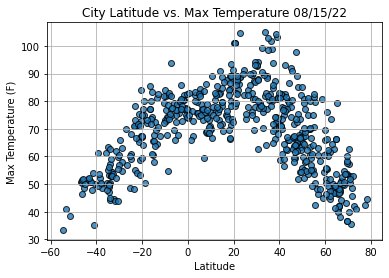

In [29]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig1.png')

#Show plot
plt.show()

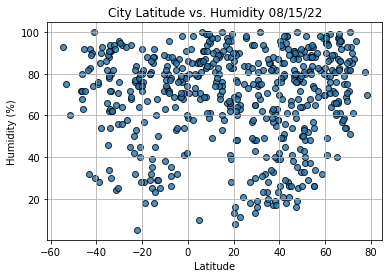

In [30]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig2.png')

#Show plot
plt.show()

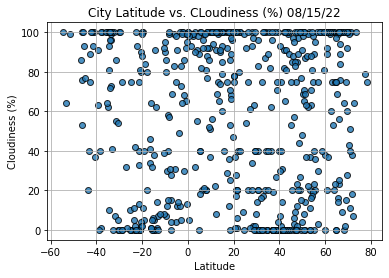

In [31]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig3.png')

#Show plot
plt.show()

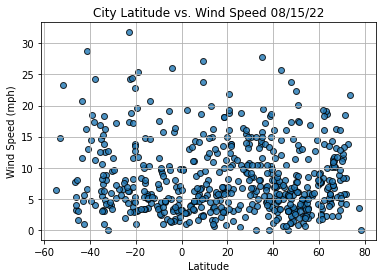

In [32]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig4.png')

#Show plot
plt.show()

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (755688848.py, line 3)

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-08-15 22:02:02,57.7900,-152.4072,58.51,82,100,9.22
1,Cabo San Lucas,MX,2022-08-15 21:58:15,22.8909,-109.9124,88.61,65,100,11.50
2,Sur,OM,2022-08-15 22:02:03,22.5667,59.5289,88.83,63,100,1.36
3,Ulaangom,MN,2022-08-15 22:02:03,49.9811,92.0667,55.69,50,4,7.70
4,Derzhavinsk,KZ,2022-08-15 22:02:04,51.1000,66.3167,58.01,48,0,6.02


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

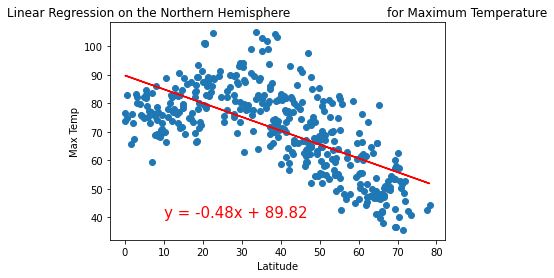

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

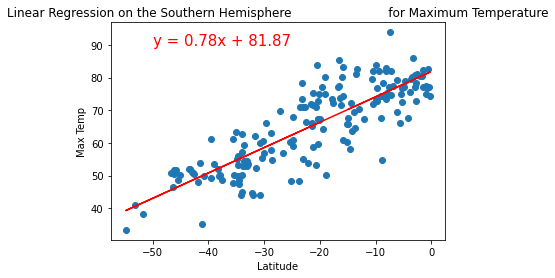

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

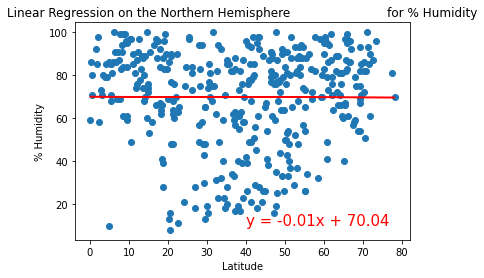

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

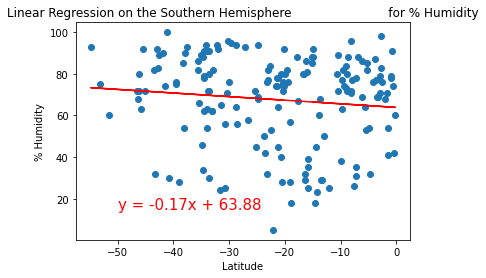

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

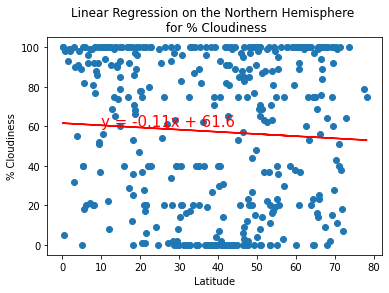

In [42]:
#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

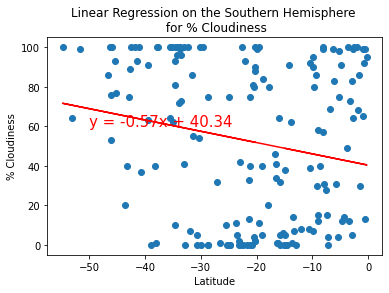

In [43]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

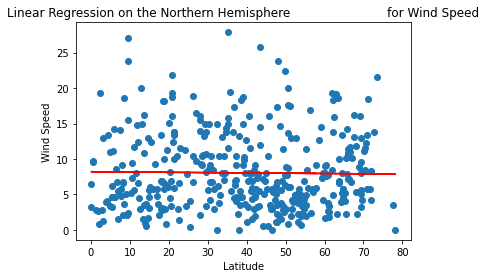

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

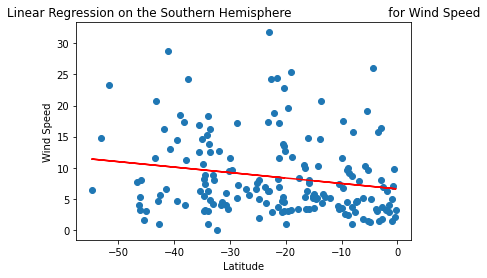

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))